In [492]:
import pandas as pd
import numpy as np
import scipy as sp

from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [447]:

data = pd.read_csv('~/desktop/zfirst_week_with_tms_less_callsigns3.csv')

data2 = pd.read_csv('~/desktop/second_week.csv')


data= data[(data.watchers > 10) & (data.show != 'u') & (data.show != '2016 NCAA Basketball Tournament')]
data2= data2[(data2.watchers > 10) & (data2.show != 'u') & (data2.show != '2016 Masters Tournament')]

data= data.reset_index(drop=True)
data2=data2.reset_index(drop=True)
data2.shape

(12091, 16)

In [450]:
data.shape

(11439, 16)

In [504]:
pd.set_option('display.max_columns', 90)
callsign_dummies = pd.get_dummies(data.callsign)
content_type_dummies = pd.get_dummies(data.content_type)
daypart_dummies = pd.get_dummies(data.daypart)
show_dummies = pd.get_dummies(data.show)


callsign_dummies2 = pd.get_dummies(data2.callsign)
content_type_dummies2 = pd.get_dummies(data2.content_type)
daypart_dummies2 = pd.get_dummies(data2.daypart)
show_dummies2 = pd.get_dummies(data2.show)


In [452]:
big_data = pd.concat([data,data2])
big_data.shape

(23530, 16)

In [505]:
#JUST WEEK 1
feature_df = pd.concat([content_type_dummies, callsign_dummies,daypart_dummies, data[['weekend']]], axis=1)
feature_df2 =pd.concat([content_type_dummies2, callsign_dummies2,daypart_dummies2, data2[['weekend']]], axis=1)

feature_with_show=pd.concat([content_type_dummies, callsign_dummies,daypart_dummies, show_dummies, data[['weekend']]], axis=1)
feature_with_show2=pd.concat([content_type_dummies2, callsign_dummies2,daypart_dummies2, show_dummies2, data2[['weekend']]], axis=1)

target_df = data.watchers
target_dfanother=data2.watchers


target_df2 = data[['watchers']]
target_dfanother2 = data2[['watchers']]

In [557]:
big_feature_df.shape

(23530, 148)

In [506]:
#JUST WEEK 2
big_feature_df = pd.concat([feature_df,feature_df2])

big_target_df = pd.concat([target_df2,target_dfanother2])

big_feature_df =big_feature_df.fillna(0)

big_show_feature_df=pd.concat([feature_with_show,feature_with_show2])
big_show_feature_df =big_show_feature_df.fillna(0)

In [508]:
big_show_feature_df.shape

(23530, 2556)

In [415]:
#ignore this 

feature_columns_with_extra =feature_df.drop('watchers', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('cid', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('show', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('tms10', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('description', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('air_time', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('daypart', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('genre1', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('genre2', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('genre3', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('actor1', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('actor2', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('actor3', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('callsign', axis=1)
feature_columns_with_extra =feature_columns_with_extra.drop('content_type', axis=1)

feature_columns = feature_columns_with_extra

watchers_column = dope_df[['watchers']]


#feature_cols = [feature_columns]
#feature_cols = [cols1]
#X = result[feature_cols]
#y = result.watchers


#logreg = LogisticRegression(C=1e9)

#logreg.fit(feature_columns, watchers_column)
#assorted_pred_class = logreg.predict(feature_columns)

#assorted_pred_class


ValueError: labels ['cid'] not contained in axis

In [348]:
from sklearn.tree import DecisionTreeRegressor

In [512]:
#attempting decision tree

max_depth_range = range(24, 37)
from sklearn.tree import DecisionTreeRegressor
# list to store the average RMSE for each value of max_depth
RMSE_scores = []
MAE_scores =[]
# use 10-fold cross-validation with each value of max_depth
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth)
    MSE_score = (np.mean(cross_val_score(treereg, big_show_feature_df, big_target_df, cv=10, scoring='mean_absolute_error')))
    print estimator, MSE_score
    #RMSE_scores.append(np.mean(np.sqrt(-MSE_score)))
    #print depth

200 -123.777776856
200 -122.606073828
200 -121.462712829
200 -120.918856775
200 -120.328051472
200 -119.987373025
200 -119.279319861
200 -118.444881993
200 -117.767330772
200 -116.874282156
200 -116.301827264
200 -115.586131529
200 -114.788133055


In [621]:
#attempting decision tree BIGGER DATA

X_important = treereg.transform(big_feature_with_genre_df, threshold='mean')


max_depth_range = range(70, 72, 5)
from sklearn.tree import DecisionTreeRegressor
# list to store the average RMSE for each value of max_depth
RMSE_scores = []
MAE_scores =[]
# use 10-fold cross-validation with each value of max_depth
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth)
    treereg.fit(big_feature_with_genre_df, big_target_df)
    #MAE_score = (np.mean(cross_val_score(treereg, big_feature_with_genre_df, big_target_df, cv=10, scoring='mean_absolute_error')))
    MAE_scores.append(-MAE_score)
    print MAE_score
    #RMSE_scores.append(np.mean(np.sqrt(-MSE_score)))
    

-92.1026209889


In [619]:
feature_cols = [h for h in big_feature_with_genre_df.columns]

In [620]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort('importance')

,feature,importance
0,ACMAXHD,0.000000e+00
228,Motorcycle Racing,0.000000e+00
224,Martial Arts,0.000000e+00
222,Latin,0.000000e+00
242,Poker,0.000000e+00
244,Pop,0.000000e+00
221,Kayaking,0.000000e+00
63,HDPPV,0.000000e+00
247,R&b,0.000000e+00
148,NaN,0.000000e+00


In [589]:
len(big_target_df)

23530

23530

In [635]:
null_y = []
y_pred = big_target_df[['watchers']]
for x in range(0,len(big_target_df)):
    null_y.append(205)


metrics.mean_absolute_error(null_y, y_pred)

194.08402039949002

In [596]:
type(null_y)

list

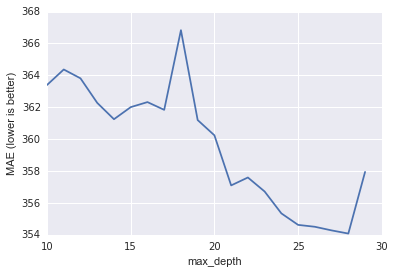

In [394]:
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('MAE (lower is better)')

In [377]:
feature_df.shape

(11439, 143)

In [580]:
#attempting bagged decision
#samples = [np.random.choice(a=len(data), size=len(data), replace=True) for _ in range(1, 11)]
target_df2 = data[['watchers']]

#treereg = DecisionTreeRegressor(max_depth=None)
X_train = big_feature_with_genre_df.iloc[:18000,:]
Y_train = big_target_df.iloc[:18000:,:]

X_test = big_feature_with_genre_df.iloc[18000:,:]
y_test = big_target_df.iloc[18000:,:]


from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, max_features=143, bootstrap=True, oob_score=True)


bagreg.fit(X_train, Y_train)
y_pred = bagreg.predict(X_test)

# calculate RMSE
metrics.mean_absolute_error(y_test, y_pred)

#bagreg.oob_score_

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  converted to the first listed format.


123.69857886602338

In [630]:
type(y_pred)

pandas.core.frame.DataFrame

In [581]:
#attempting bagged decision BIGGER DATA
#samples = [np.random.choice(a=len(data), size=len(data), replace=True) for _ in range(1, 11)]
target_df2 = data[['watchers']]

#treereg = DecisionTreeRegressor(max_depth=None)
X_train = big_feature_with_genre_df.iloc[:18000,:]
Y_train = big_target_df.iloc[:18000:,:]

X_test = big_feature_with_genre_df.iloc[18000:,:]
y_test = big_target_df.iloc[18000:,:]


from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, max_features=277, bootstrap=True, oob_score=True)


bagreg.fit(X_train, Y_train)
y_pred = bagreg.predict(X_test)

# calculate RMSE

metrics.mean_absolute_error(y_test, y_pred)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  converted to the first listed format.


101.79541572245797

In [637]:
big_feature_with_genre_df.shape

(23530, 277)

In [501]:
#np.mean_absolute_error(y_test, y_pred)
null_acc = []
for x in range(0,len(y_test)):
    null_acc.append(205)
    
metrics.mean_absolute_error(y_test, null_acc)


195.53743218806511

In [321]:
X_train.head(1)

,weekend,nan,Action,Action Sports,Adventure,Alternative,Animals,Anthology,Art,Arts/crafts,Auction,Auto,Auto Racing,Aviation,Awards,Baseball,Basketball,Biography,Bowling,Boxing,Bull Riding,Bus./financial,Card Games,Cheerleading,Collectibles,Comedy,Comedy Drama,Community,Computers,Concert,Consumer,Cooking,Country,Crime,Crime Drama,Curling,Dance,Dark Comedy,Diving,Docudrama,Documentary,Drag Racing,Drama,Educational,Entertainment,...,SHOWXHD,SMTHHD,SNYHD,SPIKEHD,SPROUTH,STZEHD,STZENHD,STZENWS,STZHD,SUNDHD,SYFYHD,TBSHD,TCMHD,TLCHD,TNCK,TNTHD,TOONHD,TRAVHD,TRUTVHD,TVLNDHD,TVONE,UHD,USAHD,VEL,VH1HD,VICEHD,WABCDT,WCBSDT,WE,WEATHHD,WEHD,WNBCDT,WNETDT,WNJUDT,WNYWDT,WPIXDT,WPXNDT,WXTVDT,daytime,earlyfringe,earlymorning,latefringe,overnight,primeaccess,primetime
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [320]:
y_train2 = watchers_column.watchers

In [180]:
bagreg.oob_score_

0.4299767831053678

In [428]:

rfreg = RandomForestRegressor()
rfreg

estimator_range = range(390, 400, 10)

RMSE_scores=[]

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, max_features=277)
    MAE_scores = cross_val_score(rfreg, feature_df, target_df, cv=5, scoring='mean_absolute_error')
    #RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

    print estimator

390


In [427]:
np.mean(MAE_scores)

-104.16442648289417

In [173]:
#plt.plot(estimator_range, RMSE_scores)
#plt.xlabel('n_estimators')
#plt.ylabel('RMSE (lower is better)')
RMSE_scores

[384.92542474629158,
 376.0318488910869,
 376.27861649072588,
 373.31736825868614,
 367.05568278790349,
 364.82315260526065,
 367.43823022628101,
 361.19469392998315,
 359.217717914525,
 360.73007009375067,
 360.99441186603616,
 361.05862422505771,
 368.35611464725247,
 355.80557083367614,
 351.87932391732113,
 351.00075434998223,
 351.87932391732113,
 351.00075434998223,
 351.87932391732113,
 351.00075434998223]

In [576]:
from sklearn.ensemble import GradientBoostingRegressor
grreg = GradientBoostingRegressor()
grreg

estimator_range = range(310, 360, 50)

MAE_scores=[]

for estimator in estimator_range:
    grreg = GradientBoostingRegressor(n_estimators=estimator, max_depth=50)
    wurk = cross_val_score(grreg, big_feature_with_genre_df, big_target_df.watchers, cv=5, scoring='mean_absolute_error')
    MAE_scores.append(np.mean((-wurk)))
    print estimator

310


In [532]:
MAE_scores

[107.17787921926319]

In [606]:
#bayes leggo
from sklearn.cross_validation import train_test_split
Xx_train, Xx_test, yy_train, yy_test = train_test_split(big_feature_with_genre_df, big_target_df)



In [607]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(fit_prior=True)
nb.fit(Xx_train, yy_train.watchers)
preds = nb.predict(Xx_test)
metrics.mean_absolute_error(yy_test, preds)

178.91568927417984

In [335]:
metrics.mean_absolute_error(yy_test, preds)

196.45559440559441

In [390]:
print data.watchers.mean()

205.800419617


In [327]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(Xx_train, yy_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [605]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
Xx_train, Xx_test, yy_train, yy_test = train_test_split(big_feature_df, big_target_df)


X = big_feature_df
y = big_target_df

# instantiate and fit
linreg = LinearRegression()
linreg.fit(Xx_train, yy_train)

y_pred = linreg.predict(Xx_test)
#metrics.r2_score(y, y_pred)
metrics.mean_absolute_error(yy_test, y_pred)

150.30910966981133

[('weekend', 11.950311468792904),
 (nan, -190836107353266.56),
 ('Action', -11.039111170769417),
 ('Action Sports', -0.29392598185867413),
 ('Adventure', 56.948097292025537),
 ('Alternative', -90.848677873013827),
 ('Animals', -78.312411926900367),
 ('Anthology', 152.05768551365097),
 ('Art', -120.49221419932057),
 ('Arts/crafts', 97.057865233320911),
 ('Auction', -4.0100610941624719),
 ('Auto', -56.354519059911212),
 ('Auto Racing', 259.1084793850805),
 ('Aviation', 14.464417780808219),
 ('Awards', 1785.9529334724475),
 ('Baseball', 20.200681730775216),
 ('Basketball', 333.07210565861817),
 ('Biography', -35.124935308218539),
 ('Bowling', -335.81481057253586),
 ('Boxing', -0.64491412233844869),
 ('Bull Riding', -115.12593580961928),
 ('Bus./financial', -43.284757788893266),
 ('Card Games', 111.54119288727166),
 ('Cheerleading', -211.81325352869166),
 ('Collectibles', -2.6109502002114766),
 ('Comedy', -19.311239442628519),
 ('Comedy Drama', 75.373903776903902),
 ('Community', -263.7122

In [224]:
#Neural Net
from pybrain.datasets            import ClassificationDataSet
from pybrain.utilities           import percentError
from pybrain.tools.shortcuts     import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules   import SoftmaxLayer
from numpy import ravel

In [528]:
from sknn.mlp import Regressor, Layer
from Theano.tensor.signal import pool


X_train = big_feature_df.iloc[:18000,:]
Y_train = big_target_df.iloc[:18000:,:]

X_test = big_feature_df.iloc[18000:,:]
y_test = big_target_df.iloc[18000:,:]

netwurk = Regressor(verbose=True,layers=[
        Layer("Rectifier", units=100),
        Layer("Linear")],
    learning_rate=0.02,
    n_iter=10)
netwurk.fit(X_train, Y_train)

.

//anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


KeyError: 'None of [[17685]] are in the [index]'

In [ ]:
#data['genres']= data[data.columns[7:10]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
#data.genres

all_genres=[]

data.genre1=data.genre1.str.strip()
data.genre2=data.genre2.str.strip()
data.genre3=data.genre3.str.strip()


data.genre1.apply(lambda x: all_genres.append(x))
data.genre2.apply(lambda x: all_genres.append(x))
data.genre3.apply(lambda x: all_genres.append(x))

total_genres = set(all_genres)

genre_dict_list=[] 

for row in range(len(data)): 
    genre_dict_list.append({x:0 for x in total_genres})
        
for row in range(len(data)):
    
    for genre in genre_dict_list[row]:
        if (data.iloc[row][7] == genre) or (data.iloc[row][8] == genre) or (data.iloc[row][9] == genre):
            genre_dict_list[row][genre] = 1 
            if row % 100 == 0:
                print row



#run this 1
all_actors=[]


data.actor1=data.actor1.str.strip()
data.actor2=data.actor2.str.strip()
data.actor3=data.actor3.str.strip()

data.actor1.apply(lambda x: all_actors.append(x))
data.actor2.apply(lambda x: all_actors.append(x))
data.actor3.apply(lambda x: all_actors.append(x))

unique_actors = set(all_actors)

actors_dict_list=[]
print 'here'
for row in range(len(data)): 
    actors_dict_list.append({x:0 for x in unique_actors})
    
print 'yeah'
for row in range(len(data)):
    for actor in actors_dict_list[row]:
        if (data.iloc[row][10] == actor) or (data.iloc[row][11] == actor) or (data.iloc[row][12] == actor):
            actors_dict_list[row][actor] = 1 
            
    if row % 100 == 0:
        print row           
genre_df = pd.DataFrame.from_records(genre_dict_list)
actor_df = pd.DataFrame.from_records(actor_dict_list)

In [544]:
all_genres=[]

big_data.genre1=big_data.genre1.str.strip()
big_data.genre2=big_data.genre2.str.strip()
big_data.genre3=big_data.genre3.str.strip()


big_data.genre1.apply(lambda x: all_genres.append(x))
big_data.genre2.apply(lambda x: all_genres.append(x))
big_data.genre3.apply(lambda x: all_genres.append(x))

total_genres = set(all_genres)

genre_dict_list=[] 
print 'here'
for row in range(len(big_data)): 
    genre_dict_list.append({x:0 for x in total_genres})
print 'blah'        
for row in range(len(big_data)):
    
    for genre in genre_dict_list[row]:
        if (big_data.iloc[row][9] == genre) or (big_data.iloc[row][10] == genre) or (big_data.iloc[row][11] == genre):
            genre_dict_list[row][genre] = 1 
            if row % 20 == 0:
                print row

here
blah
0
20
40
60
60
80
80
80
100
100
120
140
160
160
180
200
240
240
260
260
280
300
320
320
320
340
340
360
380
400
400
420
420
420
440
460
480
500
520
520
540
560
560
580
580
600
620
620
620
640
660
680
680
680
700
720
720
720
740
760
780
780
800
800
800
820
840
840
860
860
880
880
900
920
940
960
980
1000
1020
1020
1020
1040
1060
1080
1080
1080
1100
1100
1120
1120
1120
1140
1160
1160
1160
1180
1200
1200
1200
1220
1220
1240
1260
1260
1260
1280
1300
1300
1300
1320
1320
1320
1340
1360
1360
1360
1380
1380
1400
1400
1400
1420
1420
1420
1440
1460
1460
1480
1500
1520
1540
1540
1540
1560
1560
1580
1600
1620
1620
1640
1660
1660
1660
1680
1680
1680
1700
1720
1720
1740
1740
1760
1760
1780
1800
1800
1820
1820
1840
1840
1860
1880
1900
1900
1920
1940
1940
1960
1980
2000
2000
2020
2040
2060
2080
2080
2100
2100
2100
2120
2120
2140
2140
2160
2160
2160
2180
2200
2220
2240
2240
2260
2260
2260
2280
2300
2320
2320
2320
2340
2340
2360
2360
2380
2400
2420
2440
2440
2460
2480
2500
2500
2520
2540
2540
2

In [571]:
genre_df = pd.DataFrame.from_records(genre_dict_list)
big_feature_with_genre_df = pd.concat([big_feature_df, genre_df], axis=1)

In [570]:
big_feature_df=big_feature_df.reset_index(drop=True)

In [616]:
from sklearn import svm, linear_model, datasets
from sklearn.cross_validation import cross_val_score
from sklearn.svm import svr

ImportError: cannot import name svr

In [615]:
meh = svr()
meh.fit(big_feature_with_genre_df, big_target_df)

NameError: name 'svr' is not defined